In [1]:
import time
import numpy as np
import matplotlib.pyplot as pl
from scipy.spatial.distance import cdist
%matplotlib notebook
pl.ion()
pl.rcParams['figure.figsize'] = 12, 6

_colors = list('mybrgyk')
get_colors = lambda x: np.array([_colors[i] for i in x])
np.random.seed(123)

In [2]:
# Parameters
n_clusters = 6
pt_in_cluster = 100
cluster_offset = 2

In [3]:
# Instantiate data
X = np.random.randn(n_clusters*pt_in_cluster, 2)
xcls = np.zeros(n_clusters*pt_in_cluster).astype(int)

# Create separated clusters
for i in range(n_clusters):
    i1, i2 = i * pt_in_cluster, (i + 1) * pt_in_cluster
    X[i1:i2,:] += cluster_offset * i
    xcls[i1:i2] += i

X.shape, xcls.shape

((600, 2), (600,))

<IPython.core.display.Javascript object>


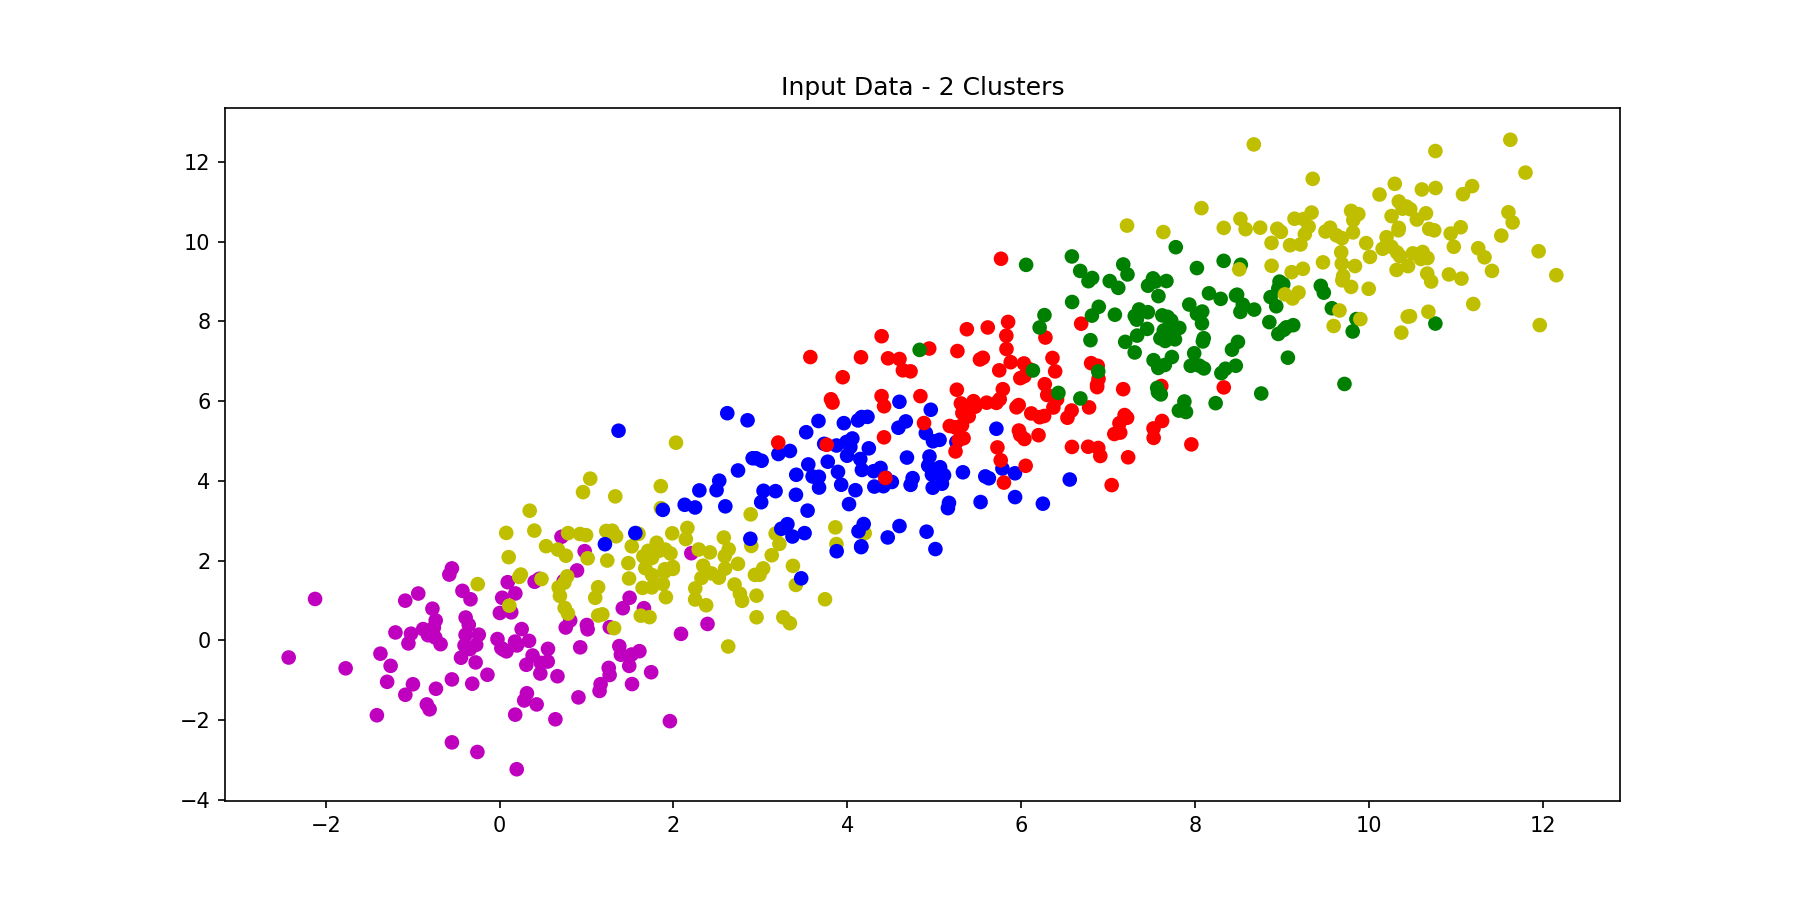

In [4]:
# Draw true clusters
pl.scatter(X[:,0], X[:,1], c=get_colors(xcls))
pl.title('Input Data - 2 Clusters');

<IPython.core.display.Javascript object>


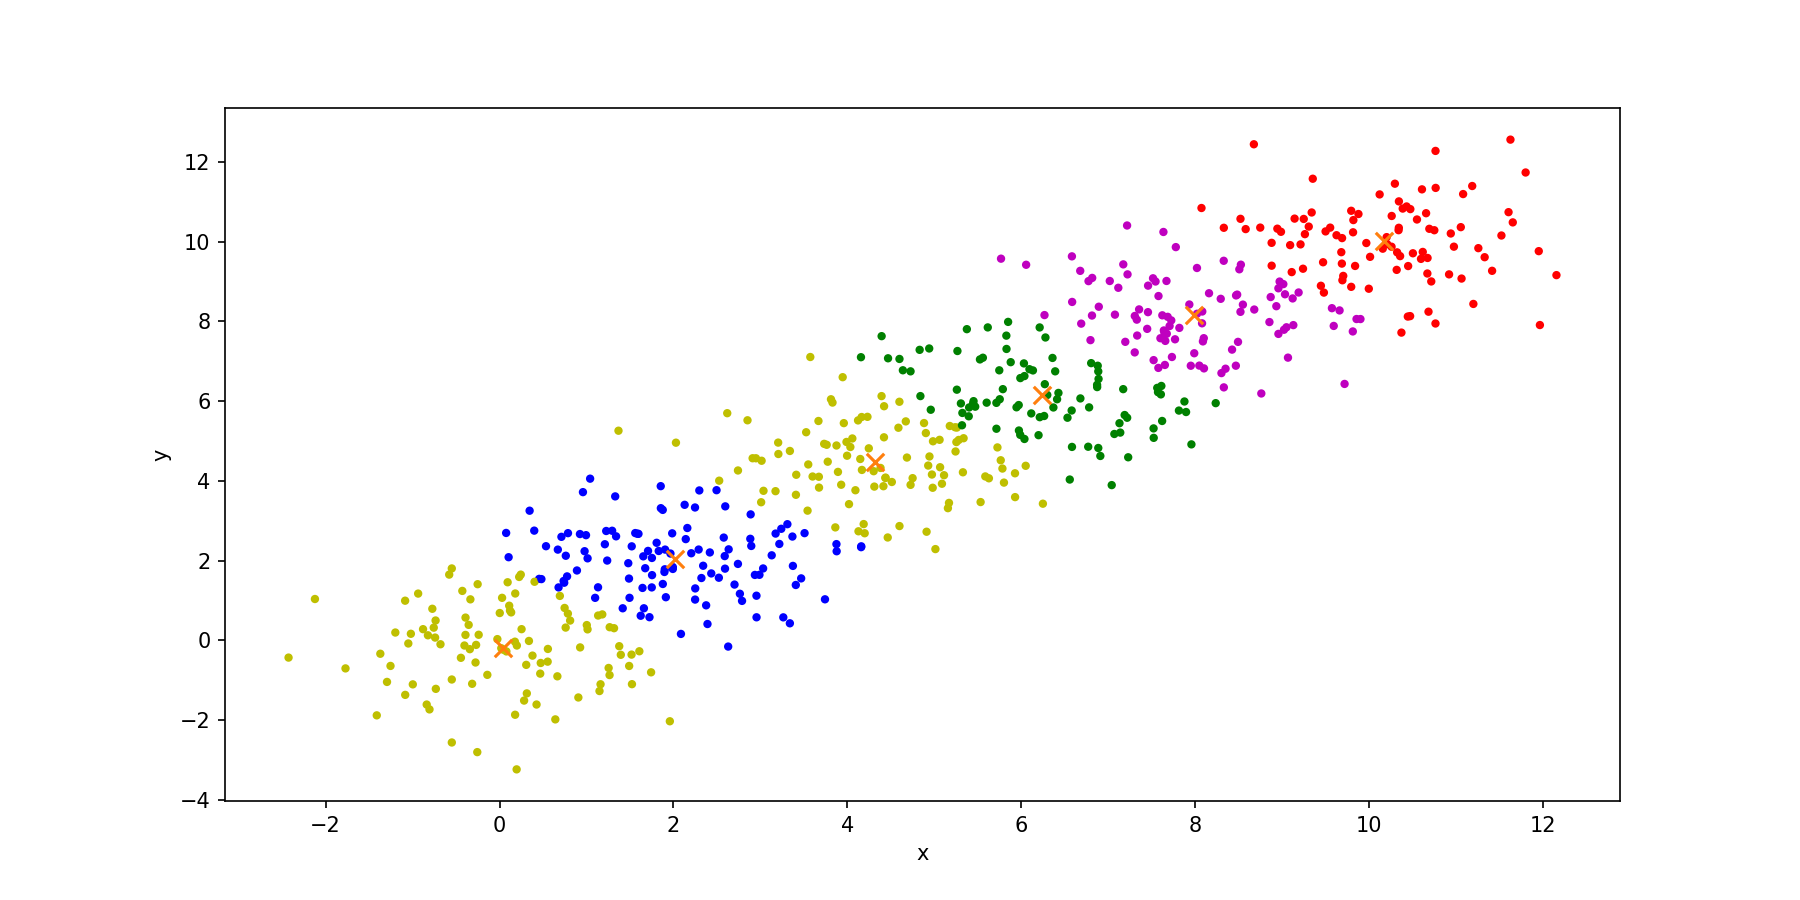

updated centers:
[[  9.66345482   8.82389427]
 [  0.56319677   0.73808692]
 [  3.74812125   3.18130293]
 [  9.48698652  10.62093145]
 [  6.7611766    6.83737058]
 [  4.61895654   5.65562153]]
updated centers:
[[  9.54577714   8.74548025]
 [  0.58217547   0.57916477]
 [  3.34344421   3.06219054]
 [  9.89775761  10.58664332]
 [  7.01822099   6.95670246]
 [  4.82296289   5.39575864]]
updated centers:
[[  9.37328739   8.64843501]
 [  0.45148583   0.39799155]
 [  2.89654472   2.80645494]
 [ 10.05412718  10.46562171]
 [  7.10046595   7.12154973]
 [  4.96463224   5.20301808]]
updated centers:
[[  9.17420575   8.63522344]
 [  0.31721035   0.20396102]
 [  2.61637908   2.61301876]
 [ 10.21328346  10.36640158]
 [  7.10716301   7.20181752]
 [  4.97075102   5.124196  ]]
updated centers:
[[  9.06609269   8.62746657]
 [  0.22425598   0.03837634]
 [  2.43608259   2.48862394]
 [ 10.23954671  10.33878628]
 [  7.06436318   7.16992384]
 [  4.93278594   5.06746684]]
updated centers:
[[  8.87431109e+00   8.

In [5]:
# Instantiate cluster centers with random points
# Originally I generated random points, but that would occasionally 
# cause some centroids to not have any points and drop out (get nan values).
# This ensures that there will be at least 1 point for each centroid
centers = X[np.random.randint(X.shape[0], size=n_clusters)]

# Create figure
fig, ax = pl.subplots()
lx = ax.scatter(X[:,0], X[:,1], marker='.')
lc = ax.scatter(centers[:,0], centers[:,1], marker='x', s=70)
ax.set_xlabel('x')
ax.set_ylabel('y')
pl.show()

# params
threshold = 0.1
max_iter = 50
update_period = 0.5

# Run 
while True:
    # Store clusters for comparison
    lastc = centers
    
    # Calculate distances and get new cluster assignments
    distances = cdist(X, centers)
    newcl_assignments = np.argmin(distances, axis=1)
    
    # Update centers
    centers = np.array([
        X[newcl_assignments == i].mean(0)
        for i in range(n_clusters)
    ])
    
    # Update plot
    lx.set_color(get_colors(newcl_assignments))
    lc.set_offsets(centers)
    fig.canvas.draw()
    print('updated centers:')
    print(centers)
    
    # End loop if distance is small enough or on max iterti
    if np.sqrt(np.sum((centers - lastc)**2)) < threshold or not max_iter:
        print('final iteration change', np.sqrt(np.sum((centers - lastc)**2)))
        break
    max_iter -= 1
    time.sleep(update_period)
    

Points: 10

Total: 9